In [1]:
import numpy as np
from scipy import constants
import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from IonChainTools import calcPositions,lengthScale
from tweezer_functions import *

In [2]:
#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

In [3]:
N = 12
#tweezed ions is an adjustable parameter
tweezed_ions = [0,1,5,6,10,11]


NA = 0.6
tweezer_wavelength = 532*1e9
#power of tweezer beam is a changeable parameter
U_tweezer = 20e-3
beam_waist = 0.41*tweezer_wavelength / NA



tweezer_strength_a = omega_axial(U_tweezer,beam_waist,tweezer_wavelength,m)
tweezer_strength_r = omega_radial(U_tweezer,beam_waist,m)

omega_tweezer_r = np.zeros(N)
omega_tweezer_a = np.zeros(N)
omega_tweezer_r[tweezed_ions] = tweezer_strength_r
omega_tweezer_a[tweezed_ions] = tweezer_strength_a

#print(omega_tweezer_r)
#print(omega_tweezer_a)

omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)

tweezer_r_to_rf_ratio = tweezer_strength_r / omega_rf_r
tweezer_r_to_axial_ratio = tweezer_strength_r / omega_a
tweezer_a_to_rf_ratio = tweezer_strength_a / omega_a

omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
omega_combined_ra = np.sqrt(omega_rf_r**2 + omega_tweezer_a)
omega_combined_ar = np.sqrt(omega_a**2 + omega_tweezer_r**2)
#print(omega_combined_r)

In [4]:
print(tweezer_r_to_rf_ratio[0],tweezer_r_to_axial_ratio[0],tweezer_a_to_rf_ratio[0])
#I think it could be useful to play around with these ratios, here's three parameters

4.806948505383453e-07 3.8455588043067624e-06 1.2666656108264598e-06


In [5]:
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)
ra_modes = mode_calc_r(m,omega_combined_ra,omega_a)
ar_modes = mode_calc_a(m,omega_combined_ar)
base_r = mode_calc_r(m,omega_rf_r,omega_a)
base_a = mode_calc_a(m,omega_a)
#not sure what this is printing out...but it's not relevent 

[960214.10717229 892651.21642977 824159.20713695 754617.0111732
 683872.5685121  611730.19520174 125000.00000046 216506.35085127
 302255.88714673 383796.58625299 537930.58928556 462118.99405252]
[960214.10717134 892651.21643036 824159.20713446 754617.01116941
 683872.56850399 611730.19519384 125000.         216506.35085008
 302255.88714359 383796.58624992 537930.5892805  462118.99405032]


In [6]:
#testing that everything from above worked...
#print(base_a)

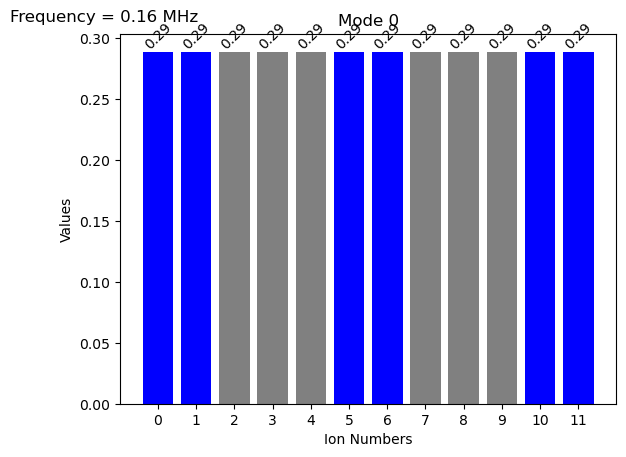

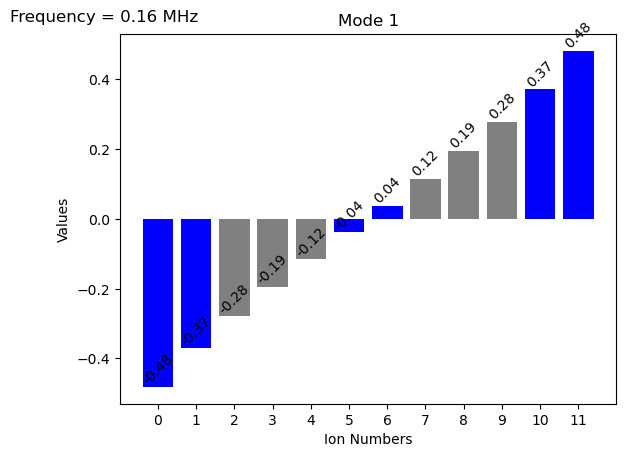

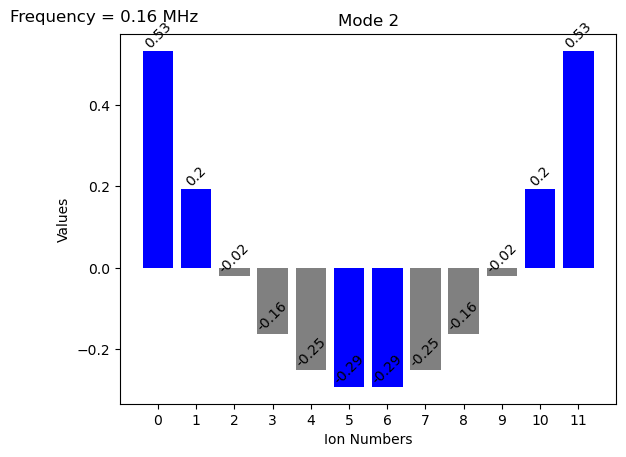

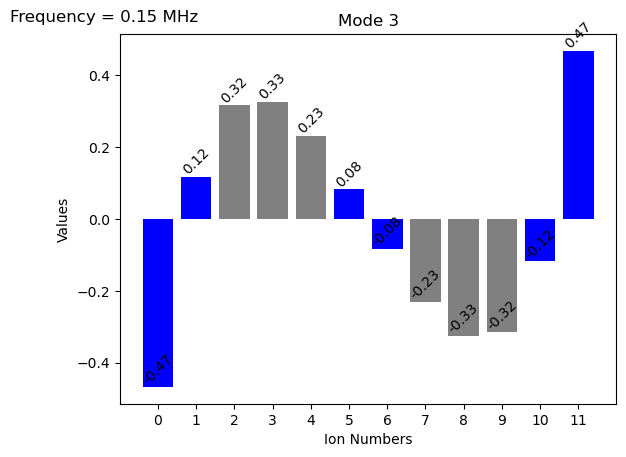

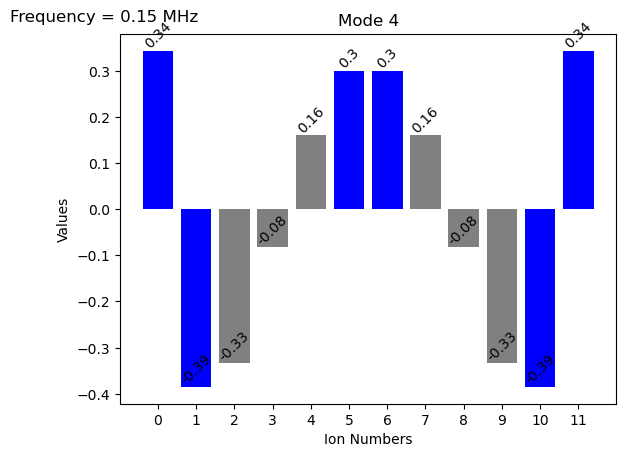

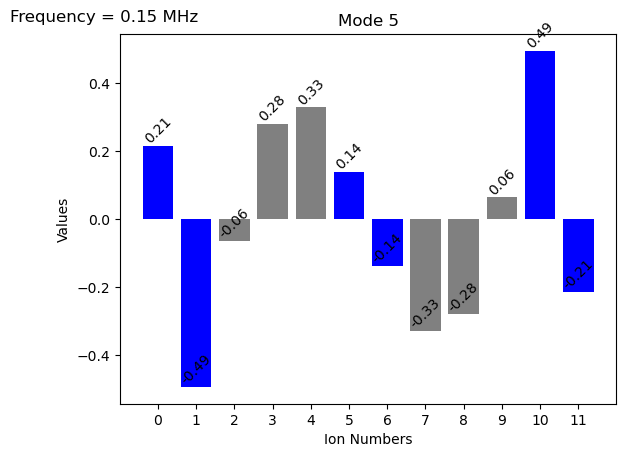

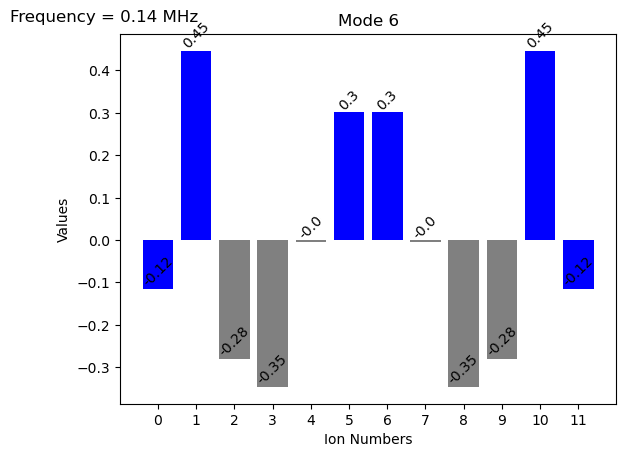

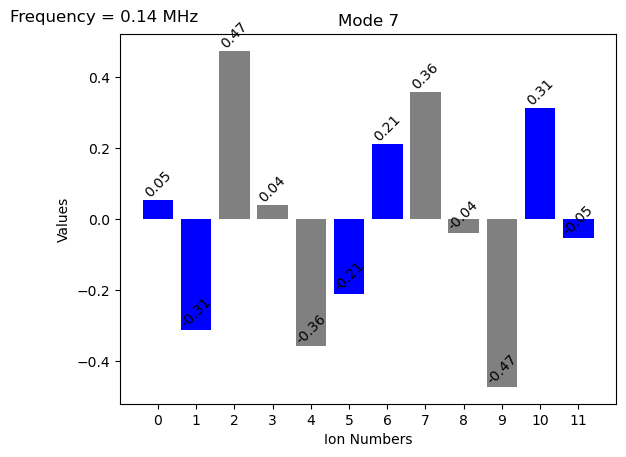

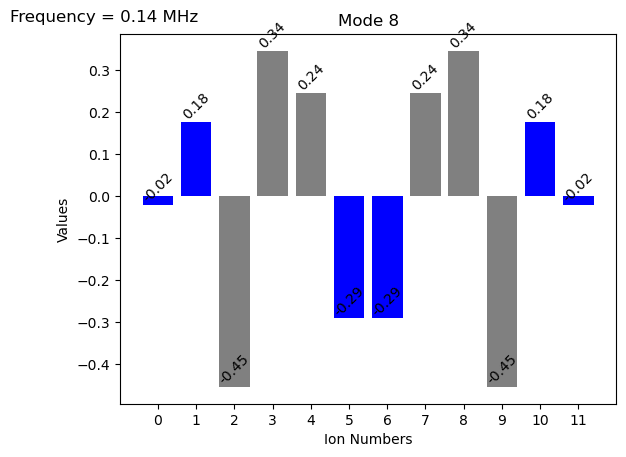

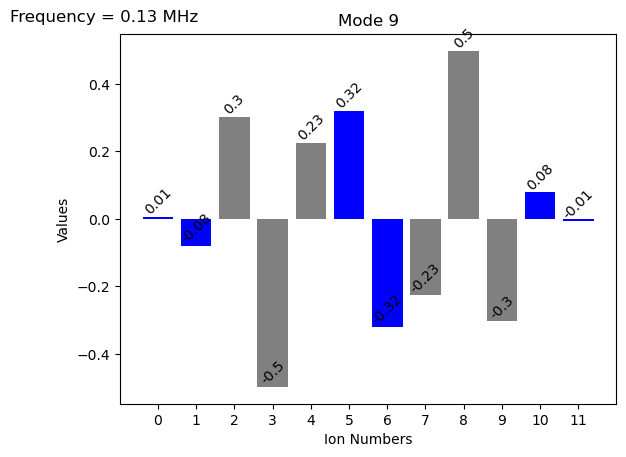

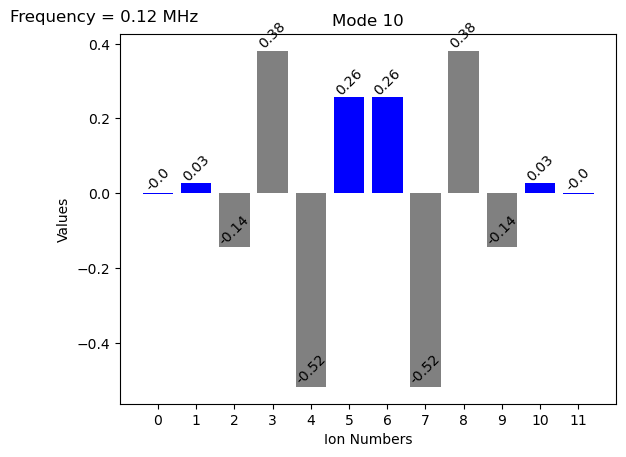

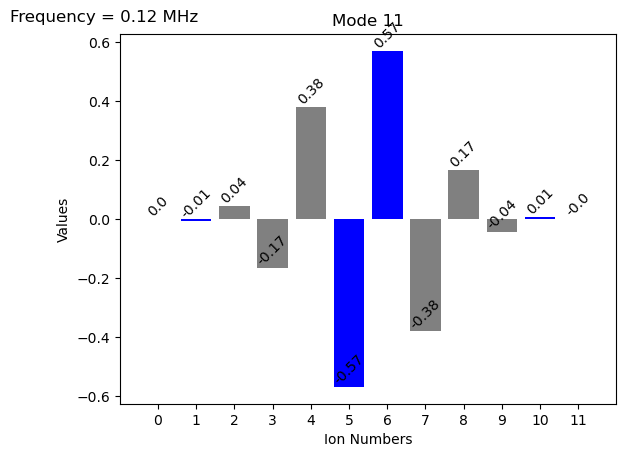

In [7]:
#plotting the e-freqs and e-modes for the tweezer_r and rf_r modes
for i in range(len(rr_modes)):
    ion_numbers = np.arange(0, N)
    colors = ['blue' if x in tweezed_ions else 'gray' for x in ion_numbers]
     # Convert frequency to MHz
    frequency_mhz = rr_modes[i][0] / (2 * np.pi * 1e6)
    
    plt.bar(ion_numbers, rr_modes[i][1],color = colors)
    for index, value in enumerate(rr_modes[i][1]):
        plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', rotation=45)
    
    plt.figtext(0.1, 0.9, f'Frequency = {frequency_mhz:.2f} MHz', fontsize=12, ha='center', va='bottom')
    plt.xticks(ion_numbers)
    plt.title(f'Mode {i}')
    plt.xlabel('Ion Numbers')
    plt.ylabel('Values')
    plt.show()

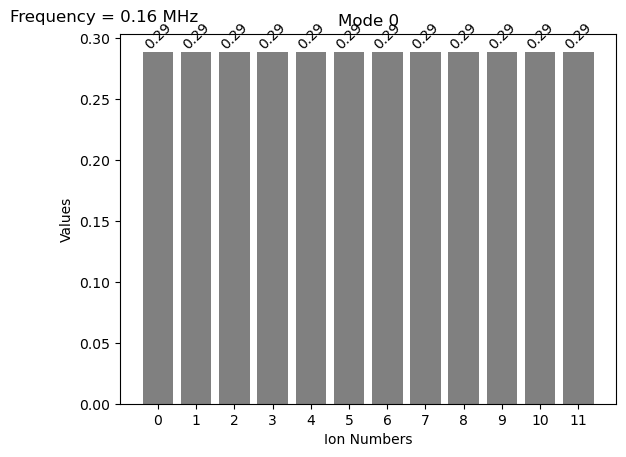

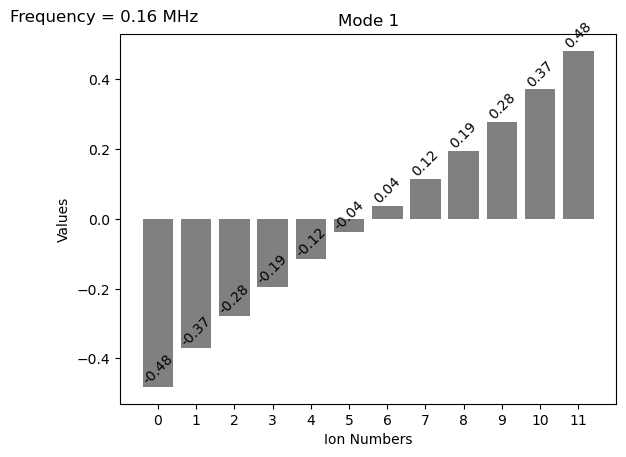

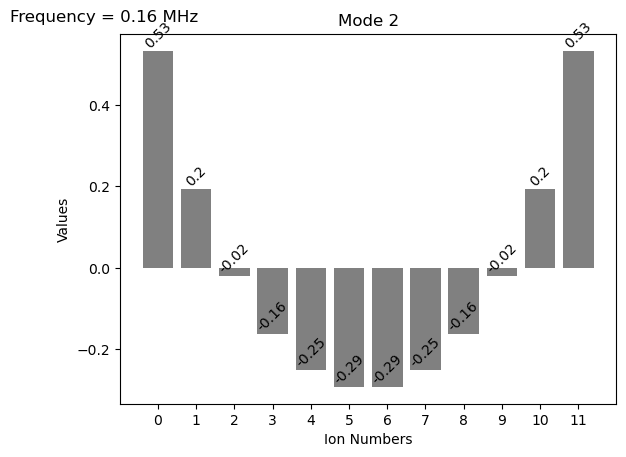

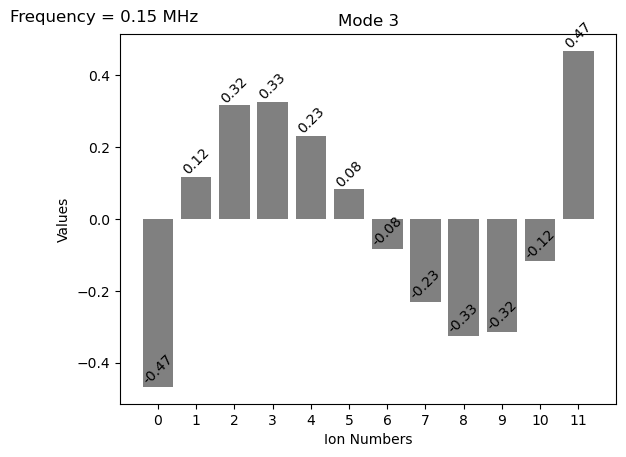

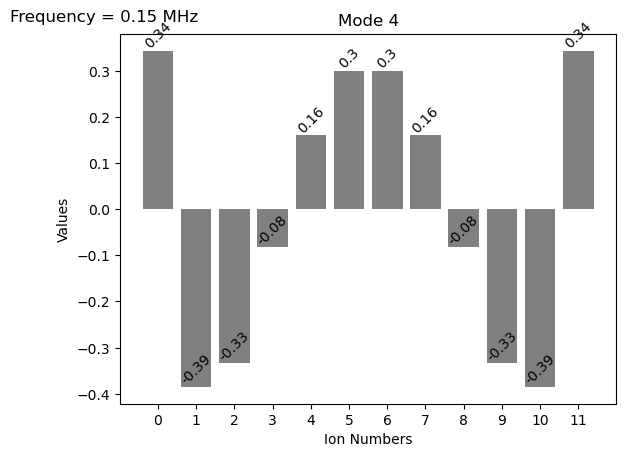

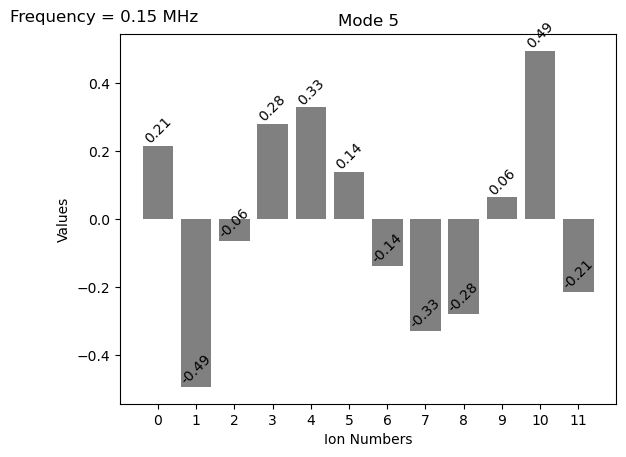

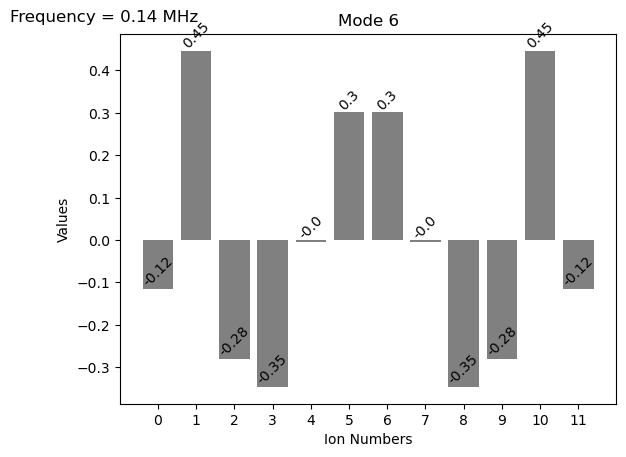

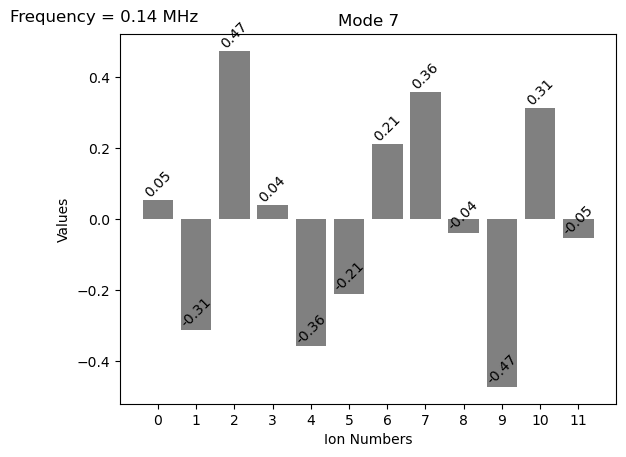

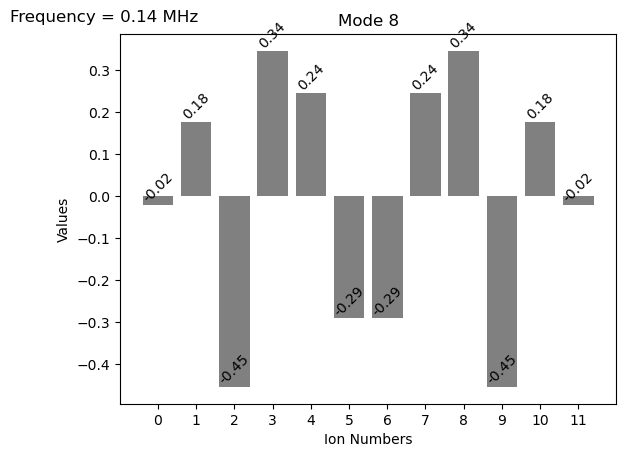

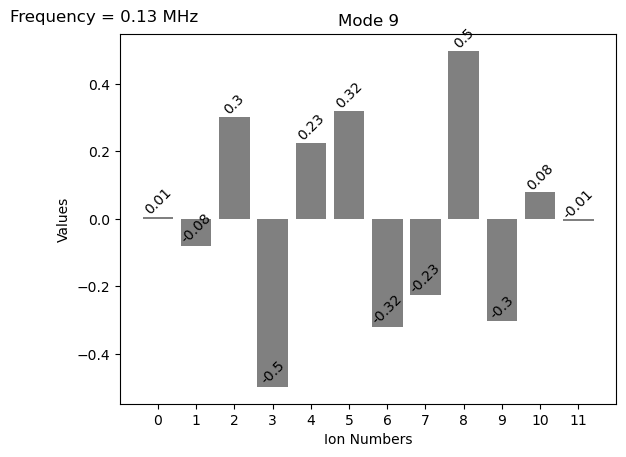

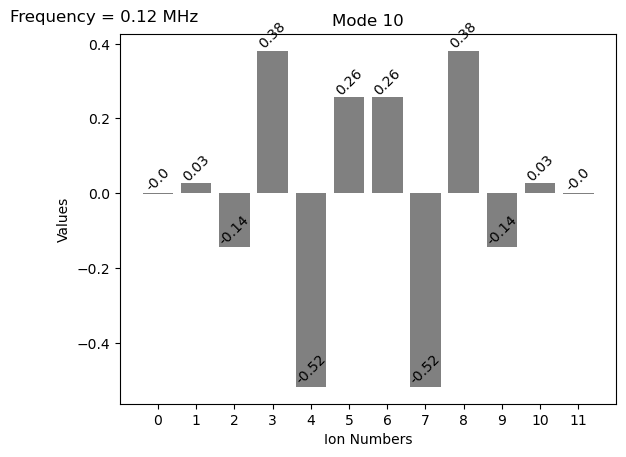

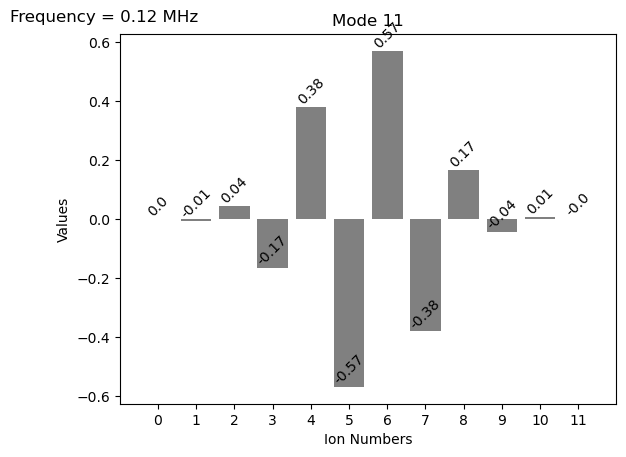

In [13]:
#plotting the e-freqs and e-modes for the rf_r modes

for i in range(len(base_r)):
    ion_numbers = np.arange(0, N)
    colors = 'gray'#['blue' if x in tweezed_ions else 'gray' for x in ion_numbers]
     # Convert frequency to MHz
    frequency_mhz = base_r[i][0] / (2 * np.pi * 1e6)
    
    plt.bar(ion_numbers, base_r[i][1],color = colors)
    for index, value in enumerate(base_r[i][1]):
        plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', rotation=45)
    
    plt.figtext(0.1, 0.9, f'Frequency = {frequency_mhz:.2f} MHz', fontsize=12, ha='center', va='bottom')
    plt.xticks(ion_numbers)
    plt.title(f'Mode {i}')
    plt.xlabel('Ion Numbers')
    plt.ylabel('Values')
    plt.show()